# Exercise Sheet 8

Homework by: Jakob Kreft and Lukas Matt

#### Imports

In [72]:
import numpy as np
import torch
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression

## 1 Projection Trick

The data in `data2d.npy`, labels.npy is a 2D classification problem.

### (a)
Can this problem be solved with a linear decision boundary in 2D? Apply logistic regression (as implemented in scikit-learn, `sklearn.linear model.LogisticRegression`), and visualize the decision boundary of the classifier in a scatter plot of the data. Which accuracy do you get?

In [2]:
# Load the data
xy = np.load('data/data2d.npy')
labels = np.load('data/labels.npy')

In [37]:
print(f'{xy.shape = }')
print(f'{labels.shape = }')

print(f'labels: {np.unique(labels)}')
xy0, xy1 = xy[labels == 0], xy[labels == 1]
print(f'distribution of classes: {xy0.shape[0]} : {xy1.shape[0]}')

xy.shape = (500, 2)
labels.shape = (500,)
labels: [0 1]
distribution of classes: 250 : 250


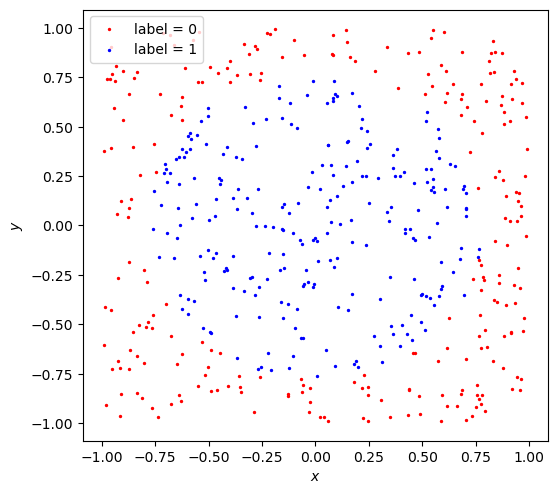

In [21]:
# TODO: Plot the data
plt.figure(figsize=(6,5.6))
plt.scatter(*xy0.T, s=2, color='r', label='label = 0')
plt.scatter(*xy1.T, s=2, color='b', label='label = 1')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.show()

In [13]:
# TODO: fit logistic regression
logreg = LogisticRegression()
logreg.fit(xy, labels)

# TODO: compute the accuracy
prediction = logreg.predict(xy)
accuracy = np.count_nonzero(prediction == labels) / len(labels)
print(f'{accuracy = }')

accuracy = 0.558


In [14]:
# TODO: visualize the decision boundary
# Retrieve the model parameters.
b = logreg.intercept_[0]
w1, w2 = logreg.coef_.T
# Calculate the intercept and gradient of the decision boundary.
c = -b/w2
m = -w1/w2

# Plot the data and the classification with the decision boundary.
mini, maxi = -1, 1
x = np.array([mini, maxi])
bound = m*x + c

<IPython.core.display.Javascript object>


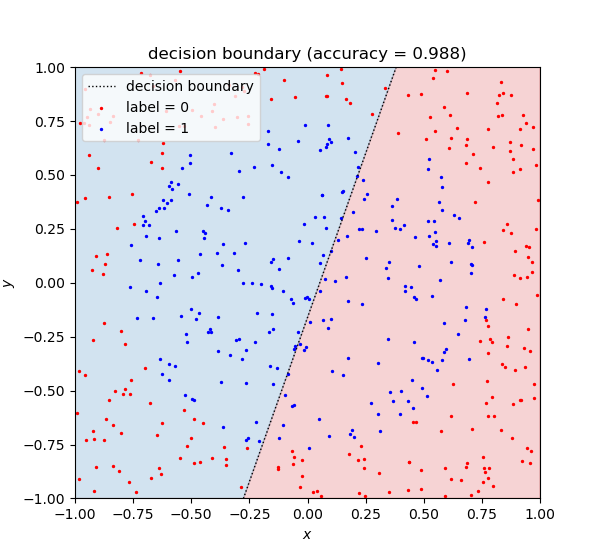

In [85]:
plt.figure(figsize=(6,5.6))
plt.title(f'decision boundary ({accuracy = })')
plt.plot(x, bound, 'k', lw=1, ls=':', label='decision boundary')
plt.fill_between(x, bound, mini, color='tab:red', alpha=0.2)
plt.fill_between(x, bound, maxi, color='tab:blue', alpha=0.2)
plt.scatter(*xy0.T, s=2, color='r', label='label = 0')
plt.scatter(*xy1.T, s=2, color='b', label='label = 1')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='upper left')
plt.xlim([mini,maxi])
plt.ylim([mini,maxi])
plt.show()

The linear decision boundary is a straight line (surprise surprise) which is somewhat arbitrarily positioned roughly through the center of the data. It does not very well describe the distribution of the class labels in 2D space.

The classification accuracy is $0.558$ at equal counts of the two classes, i.e. almost random.

We conclude that the problem can not be solved using just a linear decision boundary in 2D.

### (b)
Come up with a nonlinear transformation to enhance the feature space, such that the classes can be
linearly separated. Visualize the points in the new, 3D feature space. Demonstrate that the problem
can be solved in the enhanced space using logistic regression.

Since the datapoints of class 1 seem to form a disk in 2D space, centered around zero, we choose the radius from the origin $(0,0)$ as the third feature:

$$ r = \sqrt{x^2 + y^2} $$

<IPython.core.display.Javascript object>


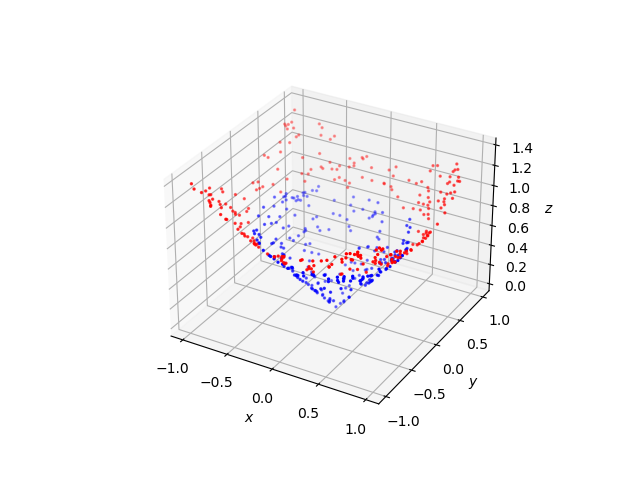

In [55]:
# TODO: Come up with a nonlinear tranformation for the third feature. Compute it and concatenate to the data.
r = np.sqrt((xy[:,0]-meanx)**2 + (xy[:,1]-meany)**2)

xyz = np.concatenate([xy, np.expand_dims(r, axis=-1)], axis=1)
xyz0, xyz1 = xyz[labels==0], xyz[labels==1]

# TODO: Show the enhanced data, e.g. with a 3D scatter plot 
#       (https://matplotlib.org/stable/gallery/mplot3d/scatter3d.html)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(*xyz0.T, s=2, color='r', label='label = 0')
ax.scatter(*xyz1.T, s=2, color='b', label='label = 1')

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')

plt.show()

In [69]:
# TODO: again, fit and evaluate logistic regression
# TODO: fit logistic regression
logreg = LogisticRegression()
logreg.fit(xyz, labels)

# TODO: compute the accuracy
prediction = logreg.predict(xyz)
accuracy = np.count_nonzero(prediction == labels) / len(labels)
misclassified = len(labels) - np.count_nonzero(prediction == labels)
print(f'{accuracy = }')
print(f'misclassified: {misclassified}')

accuracy = 0.988
misclassified: 6


In [57]:
xx, yy = np.meshgrid(np.linspace(*x, 2), np.linspace(*x, 2))

def boundary_surface(x, y, regressor):
    return (-regressor.intercept_-regressor.coef_[0][0]*x-regressor.coef_[0][1]*y) / regressor.coef_[0][2]

In [77]:
xy[prediction != labels]

array([[ 0.76780534, -0.119936  ],
       [ 0.76159936, -0.15812471],
       [-0.74466592,  0.27176178],
       [-0.25745321,  0.73775985],
       [ 0.52248936,  0.57588183],
       [ 0.69509388, -0.35206354]])

<IPython.core.display.Javascript object>


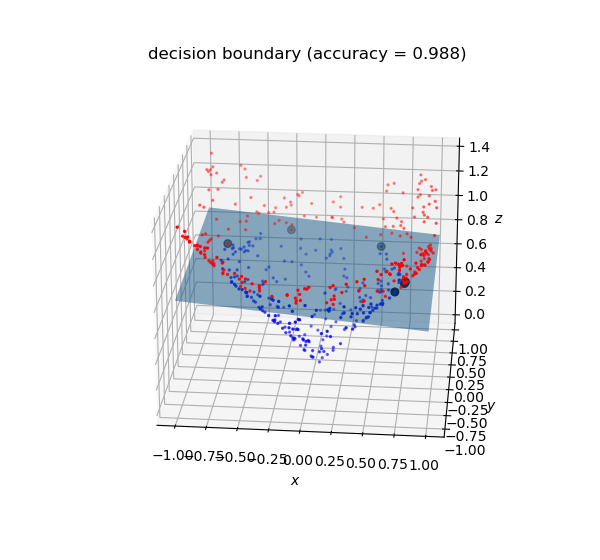

In [90]:
%matplotlib notebook
fig = plt.figure(figsize=(6,5.6))
ax = fig.add_subplot(projection='3d')
ax.set_title(f'decision boundary ({accuracy = })')
ax.scatter(*xyz0.T, s=2, color='r', label='label = 0')
ax.scatter(*xyz1.T, s=2, color='b', label='label = 1')
ax.scatter(*xy[prediction != labels].T, r[prediction != labels], s=30, color='black', edgecolor='k')
ax.plot_surface(xx, yy, boundary_surface(xx, yy, logreg), color='tab:blue', alpha=0.5)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
plt.show()

This looks much better. The datapoints form a cone, and the two classes can be well separated by the new decision boundary (a 2D plane that intersects the cone).

An accuracy of $0.988$ is reached, which corresponds to $6$ wrongly classified points.

The misclassified datapoints (marked in dark) all lie very close to the decision boundary.

With the enhanced (non-linear) feature space the problem could be solved using logistic regression.

### (c)
Describe (in words) how this problem could be solved by an MLP with a single hidden layer.

(2 pts)

## 2 Training of an MLP

In this exercise, we use http://playground.tensorflow.org to gain some intuition on what happens
throughout the training of a neural network and how the different pieces interact and work together. For
each part submit a screenshot and a short discussion of what you observed.

### (a) Fitting a Neural Net.

Consider the spiral data set and the first two features $(X_1 , X_2)$. Come up
with an architecture that can learn to classify the pattern well. You are free to use any number
layers/neurons/activation functions/regularization/...

![2_a.png](2_a.png)

To start learning the spiral shape, at least 2, better 3 layers prooved necessary. With a ReLU activation function, the learning appeared fastest, but it seemed to improve when using a small amount of L2 regularization.

When looking at the individual neurons, we observe the following:

First layer learns linear decision boundaries, i.e. horizontal, vertical, diagonal, etc. lines.

The second layer combines these boundaries to form features such as curves, edges, discs with different diameters, which we recognize when looking at the spiral distribution of classes in the dataset.

### (b) Exploring Regularization.

Pick the largest network size (i.e. 6 layers of 8 neurons each) and one of
the data sets. Train it first without regularization, observing the behavior. Retrain it with L1 and L2
regularization and observe how the weight structure changes. What kind of behavior do you expect
and does it fit with what you observe?

### (c) Breaking Things.

As discussed in the lecture, a net with enough parameters can fit any kind of pattern, even if there is none. Try to replicate this observation. Have your net learn a pattern “perfectly” (i.e. very low training error), but without having predictive power (i.e. the test error stays larger than random (which would be 0.5)). Hint: If you consider the spiral data set with the minimal amount of training data and the maximum amount of noise, you get a collection of points with most structure removed.

![2_c.png](2_c.png)

## 3 Reverse Mode Automatic Differentiation

As discussed in the lecture we can describe the flow of information through a “standard” neural network as falling into two phases. First we propagate information forward through the network from the input layer to the output (sometimes referred to as forward propagation). The second phase then consists of backpropagating the error we received from the scalar loss/error/cost function that we try to optimize. The function we consider in this   exercise is

$$ y(x) = \left(\sin\frac{x_1}{x_2}+\frac{x_1}{x_2}-exp(x_2)\right)\cdot \left(\frac{x_1}{x_2}-exp(x_2) \right) $$


evaluated at $x = (1.5, 0.5)$.

### (a)
Give the computational graph of the function.

### (b)
Give the forward trace at the given x.

### (c)
Give the backward/reverse trace.

## 4 Bonus: Number of linear regions in a deep network

Show that the maximum number of linear regions in a ReLU network scales (at least) exponentially with the
depth, by explicitly constructing a sequence of ever deeper networks that demonstrate this behavior. Hint:
First do it using the absolute value as the activation function, then modify the resulting networks to use
ReLU while not changing the functions they describe.